In [1]:
pip install gdown

In [2]:
!gdown 1korMCWGMIZepq0bROcHw5PhmEKnnM0gT

Downloading...
From: https://drive.google.com/uc?id=1korMCWGMIZepq0bROcHw5PhmEKnnM0gT
To: /content/Cifar Notebook.zip
100% 11.9M/11.9M [00:00<00:00, 32.5MB/s]


In [3]:
!unzip '/content/Cifar Notebook.zip'

Archive:  /content/Cifar Notebook.zip
  inflating: CIFAR-10 Classification Using Deep Learning.ipynb  
  inflating: cifar10_trained_model.h5  
  inflating: model.json              


# TASK #1: UNDERSTAND THE PROBLEM STATEMENT  

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

# TASK #2: IMPORT LIBRARIES AND DATASET

In [4]:
import numpy as np
import datetime
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [6]:
pip install jupyterthemes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.3 MB/s eta 0:00:00


In [7]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.


In [8]:
# Import Cifar-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


**PRACTICE OPPORTUNITY #1:**
- **Check out the sizes of both training and testing datasets**

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

In [11]:
X_test.shape

(10000, 32, 32, 3)

In [12]:
y_test.shape

(10000, 1)

# TASK #3: PERFORM DATA VISUALIZATION

label = [1]


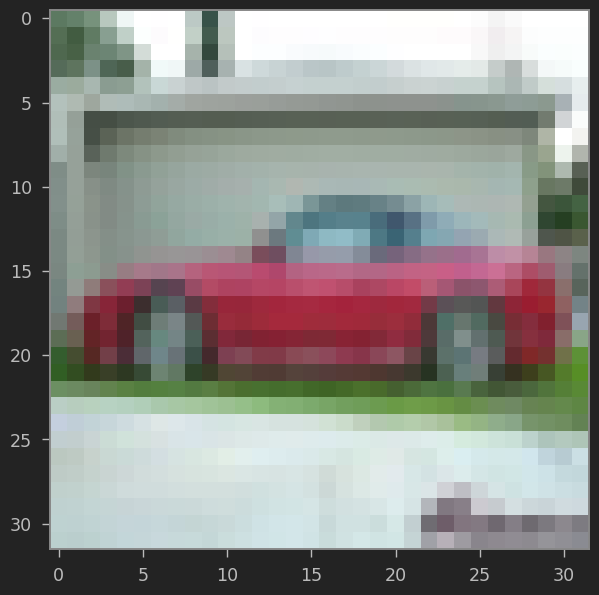

In [13]:
# Select a sample training image and visualize it
i = random.randint(1, len(X_train))
plt.imshow(X_train[i])
print('label = {}'.format(y_train[i]))

label = [5]


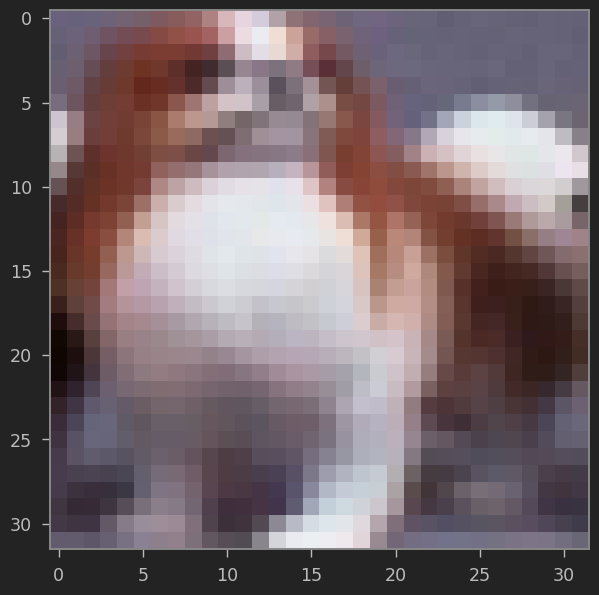

In [14]:
# Select a sample testing image and visualize it
import random
i = random.randint(1, len(X_test))
plt.imshow(X_test[i])
print('label = {}'.format(y_test[i]))

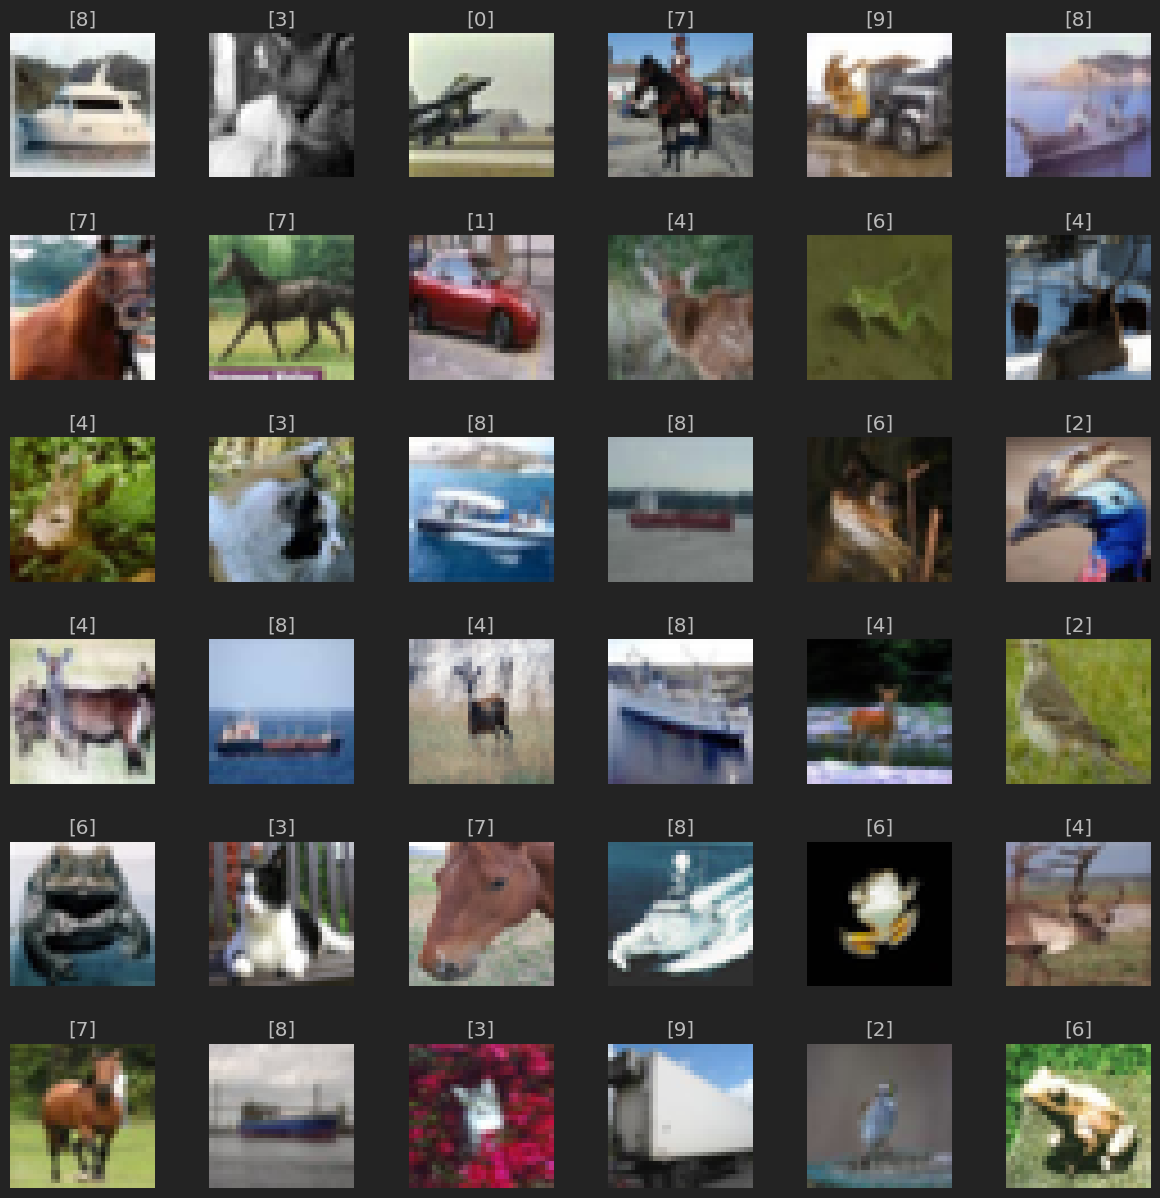

In [15]:
W_grid = 6
L_grid = 6

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

In [ ]:
**PRACTICE OPPORTUNITY #2:**
- **Plot a grid containing 100 images from the testing dataset and perform a sanity check on the data**

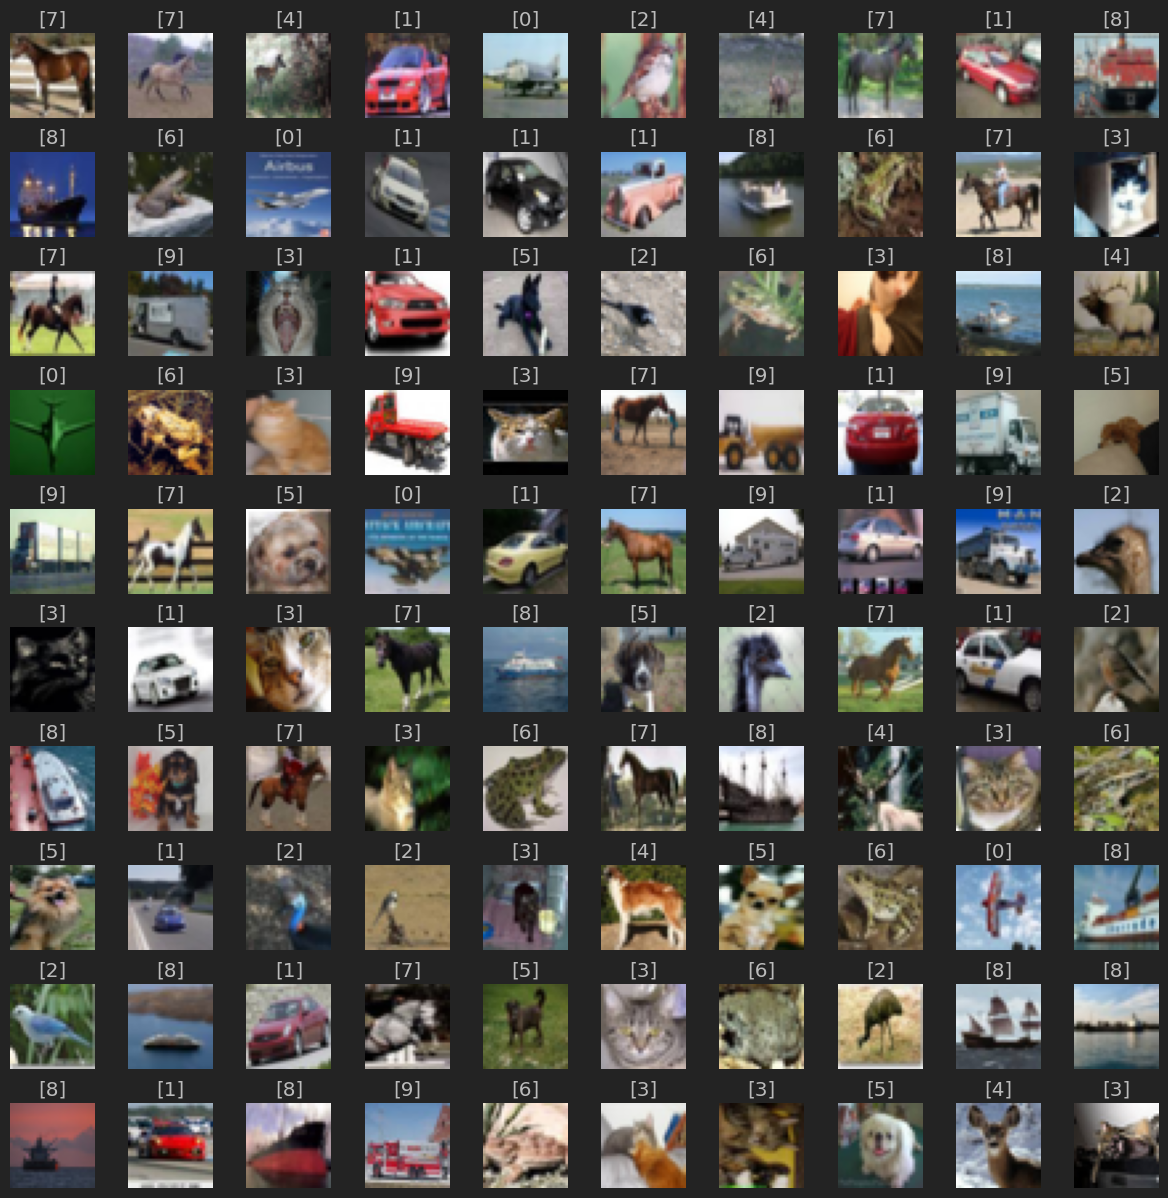

In [16]:
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

# TASK #4: PREPARE THE DATA FOR TRAINING

In [17]:
n_training

50000

In [18]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [19]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [20]:
number_cat = 10

In [21]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [22]:
y_train = tf.keras.utils.to_categorical(y_train, number_cat)

In [23]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
y_test = tf.keras.utils.to_categorical(y_test, number_cat)

In [25]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [26]:
# Normalize pixels
X_train = X_train/255
X_test = X_test/255


In [27]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [28]:
X_train.shape

(50000, 32, 32, 3)

In [29]:
Input_shape = X_train.shape[1:]

In [30]:
Input_shape

(32, 32, 3)

In [31]:
y_train.shape

(50000, 10)

# TASK #5: BUILD A DEEP NEURAL NETWORK MODEL USING KERAS

![image.png](attachment:image.png)

In [39]:
cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))


cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 64)        36928     
                                                      

**PRACTICE OPPORTUNITY #3:**
- **Add a new dense layer containing 1024 neurons**
- **Plot the model summary and determine the number of trainable parameters**

In [33]:
cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))


cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        36928     
                                                      

# TASK #6: COMPILE AND FIT A DEEP NEURAL NETWORK MODEL

In [40]:
cnn.compile(optimizer = tf.keras.optimizers.legacy.RMSprop(0.0001, decay = 1e-6), loss ='categorical_crossentropy', metrics =['accuracy'])

In [41]:
history = cnn.fit(X_train, y_train, batch_size=512, epochs=1, validation_data=(X_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 12s 7ms/step - loss: 1.7621 - accuracy: 0.3470 - val_loss: 1.5497 - val_accuracy: 0.4207
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4450 - accuracy: 0.4740 - val_loss: 1.2868 - val_accuracy: 0.5326
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2903 - accuracy: 0.5373 - val_loss: 1.2978 - val_accuracy: 0.5425
Epoch 4/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1764 - accuracy: 0.5809 - val_loss: 1.1114 - val_accuracy: 0.6135
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0856 - accuracy: 0.6169 - val_loss: 1.0346 - val_accuracy: 0.6436


In [42]:
# serialize model to JSON
model_json = cnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnn.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [44]:
# load json and create model

from tensorflow.keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
cnn = model_from_json(loaded_model_json)
# load weights into new model
cnn.load_weights("model.h5")
print("Loaded model from disk")


Loaded model from disk


In [45]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 64)        36928     
                                                      

In [46]:
X_test.shape

(10000, 32, 32, 3)

In [47]:
y_test.shape

(10000, 10)

In [49]:
# evaluate loaded model on test data
cnn.compile(optimizer = tf.keras.optimizers.legacy.RMSprop(0.0001, decay = 1e-6), loss ='categorical_crossentropy', metrics =['accuracy'])
# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# score = loaded_model.evaluate(X_test, y_test, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [50]:
score = cnn.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (cnn.metrics_names[1], score[1]*100))

accuracy: 64.36%


# TASK #7: EVALUATE TRAINED MODEL

In [51]:
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 1.0346 - accuracy: 0.6436
Test Accuracy: 0.6435999870300293


In [52]:
predicted_classes = cnn.predict(X_test)
predicted_classes

313/313 [==============================] - 1s 2ms/step


array([[2.1838902e-02, 8.6618057e-03, 3.2463651e-02, ..., 1.8984271e-02,
        2.9256418e-01, 1.1448647e-02],
       [6.1649706e-02, 4.8230636e-01, 2.3159037e-05, ..., 7.1299013e-07,
        4.2647293e-01, 2.9540336e-02],
       [4.3613914e-02, 6.9793111e-01, 1.2270965e-03, ..., 1.7616103e-04,
        1.3092723e-01, 1.2511638e-01],
       ...,
       [2.0483630e-03, 3.2219203e-04, 4.5342203e-02, ..., 6.3434921e-02,
        3.4054674e-03, 1.0425880e-03],
       [2.3794296e-01, 5.0865930e-01, 6.5822095e-02, ..., 1.0026350e-02,
        2.2643356e-02, 1.8362494e-02],
       [7.6634235e-05, 1.1303964e-04, 5.8307895e-04, ..., 9.7804719e-01,
        5.4779061e-06, 8.5585634e-05]], dtype=float32)

In [53]:
predicted_classes = predicted_classes.argmax(1)

In [54]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [55]:
y_test = y_test.argmax(1)

In [56]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

<Axes: >

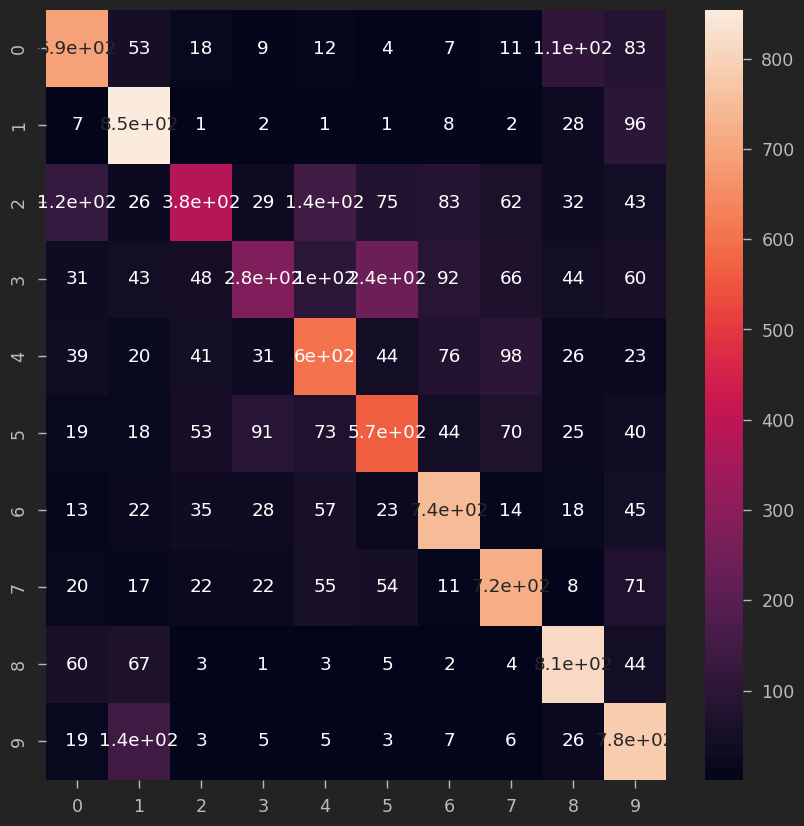

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true=y_test, y_pred=predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [ ]:
# CIFAR-10 has 10 Classes as follows:
# 0. Airplanes
# 1. Cars
# 2. Birds
# 3. Cats
# 4. Deer
# 5. Dogs
# 6. Frogs
# 7. Horses
# 8. Ships
# 9. Trucks

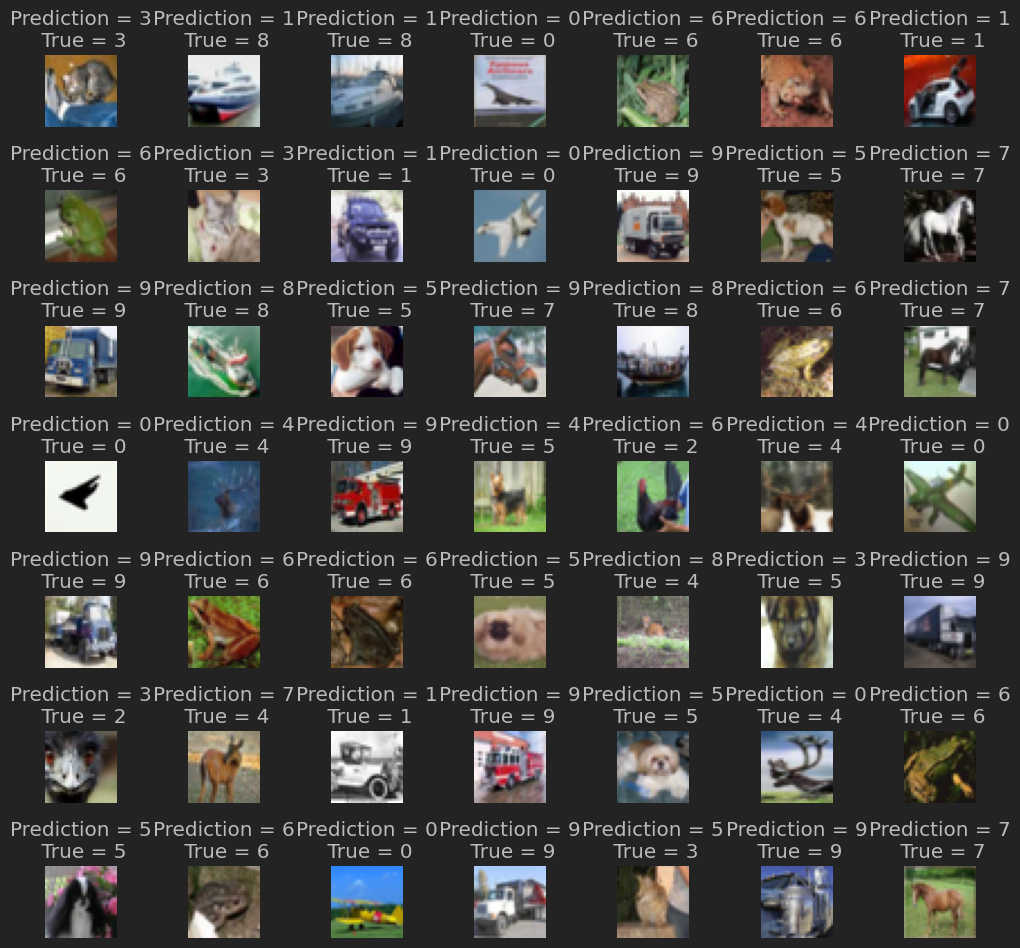

In [60]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

# AWESOME JOB!

# PRACTICE OPPORTUNITIES SOLUTIONS

**PRACTICE OPPORTUNITY #1 SOLUTION:**
- **Check out the sizes of both training and testing datasets**

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

**PRACTICE OPPORTUNITY #2 SOLUTION:**
- **Plot a grid containing 100 images and perform a sanity check on the data**

In [ ]:
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel()

n_testing = len(X_test)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_testing) # pick a random number
    axes[i].imshow(X_test[index])
    axes[i].set_title(y_test[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

**PRACTICE OPPORTUNITY #3 SOLUTION:**
- **Add a new dense layer containing 1024 neurons**
- **Plot the model summary and determine the number of trainable parameters**

In [ ]:
# Total trainable parameters = 3,814,442

cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))


cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))
cnn.summary()

